In [1]:
%run _init.py
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# Anscombes quartet

In [20]:
anscombe = pd.DataFrame(
    {"x":  np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]),
     "y1": np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]),
     "y2": np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]),
     "y3": np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]),
     "x4": np.array([8,8,8,8,8,8,8,19,8,8,8]),
     "y4": np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])  
    })


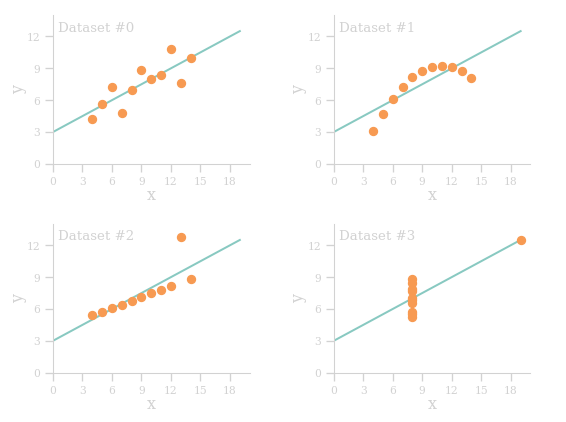

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = pyp.subplots(ncols=2, nrows=2, figsize=(6, 4.5),dpi=96)

#plot only regression line
for i,(ax,data) in enumerate(zip([ax1, ax2, ax3, ax4], [("x", "y1"), ("x", "y2"), ("x", "y3"), ("x4", "y4")])):
    #format axis
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 14)
    ax.text(0.5, 12.5, "Dataset #{}".format(i), color=col['grey'])
    ax.tick_params(width=1, size=6, labelsize=8)
    ax.set_xlabel("x", size=12, labelpad=0)
    ax.set_ylabel("y", size=12, labelpad=0)
    ax.set_xticks(np.arange(0, 20, 3))
    ax.set_yticks(np.arange(0, 14, 3))
    #linear regression
    a,b = np.polyfit(anscombe[data[0]], anscombe[data[1]], 1)
    xfit = np.arange(0, 20)
    yfit = np.polyval([a, b], xfit)
    ax.plot(xfit, yfit, color=col["blue"])

#plot raw data in superimposed axes, to be used in svg animation
ax5 = ax1.twinx()
ax6 = ax2.twinx()
ax7 = ax3.twinx()
ax8 = ax4.twinx()
for ax,data in zip([ax5, ax6, ax7, ax8], [("x", "y1"), ("x", "y2"), ("x", "y3"), ("x4", "y4")]):
    #format same
    ax.axis('off')
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 14)
    #plot data
    ax.scatter(anscombe[data[0]], anscombe[data[1]], color=col["orange"])


pyp.tight_layout()
fig.savefig("../img/anscombe.svg", transparent=True)

# Scatter plot with two histograms

In [27]:
#Linear regression example
# This is a very simple example of using two scipy tools
# for linear regression, polyfit and stats.linregress
import scipy as sp
#Sample data creation
#number of points
n=50
t=np.linspace(-8, 8, n)
#parameters
a=-0.8; b=0
x=sp.polyval([a,b],t)
#add some noise
xn=x+np.random.randn(n)
xn=xn+np.random.randn(n)


#Linear regressison -polyfit - polyfit can be used other orders polys
(ar,br)=sp.polyfit(t,xn,1)
xr=sp.polyval([ar,br],t)

linreg_res = np.zeros((10000, 2))
for i in range(10000):
    k = np.random.randint(50, size=50)
    slope, intercept = sp.polyfit(t[k], xn[k], 1)
    linreg_res[i] = [slope, intercept]
    
xy = np.vstack([linreg_res[:, 0], linreg_res[:, 1]])
z = stats.gaussian_kde(xy)(xy)

In [216]:
# nutrition study
nutrition = pd.read_csv("data/nutritionStudy.csv");
nutrition[['ID', 'Age', 'Quetelet','Calories', 'RetinolPlasma', 'Gender']].head(7)

,ID,Age,Quetelet,Calories,RetinolPlasma,Gender
0,1,64,21.4838,1298.8,915,Female
1,2,76,23.8763,1032.5,727,Female
2,3,38,20.0108,2372.3,721,Female
3,4,40,25.1406,2449.5,615,Female
4,5,72,20.9850,1952.1,799,Female
5,6,40,27.5214,1366.9,654,Female
6,7,65,22.0115,2213.9,834,Female


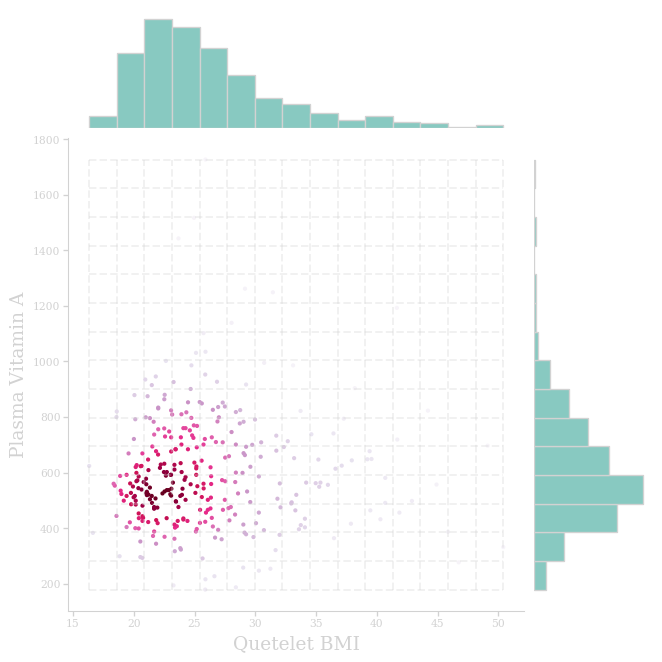

In [219]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# x = linreg_res[:, 0]
# y = linreg_res[:, 1]
x = nutrition['Quetelet'];
y = nutrition['RetinolPlasma'];
xy = np.vstack([x, y])
z = stats.gaussian_kde(xy)(xy)
newBinning = 15;


fig, axScatter = pyp.subplots(figsize=(7, 7), dpi=96)

# the scatter plot:
axScatter.scatter(x, y, c=z, s=10, cmap=pyp.get_cmap('PuRd'), edgecolor='')

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

hx = axHistx.hist(x, bins=newBinning, color=col["blue"], edgecolor=col["grey"])
hy = axHisty.hist(y, bins=newBinning, orientation='horizontal', color=col["blue"], edgecolor=col["grey"])

#Remove unecessary labels and ticks from top and bottom axis
for ax in [axHistx]:
    ax.tick_params(axis='x', bottom='off', top='off', labelbottom='off')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(axis='y', which='major', direction='out', width=1, length=4, color='k',
               labelsize=8, pad=2)
    ax.axis("off")

for ax in [axHisty]:
    ax.tick_params(axis='y', left='off', right='off', labelleft='off')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='both', which='major', direction='out', width=1, length=4, color='k',
               labelsize=8, pad=2)
    for tick in ax.get_xticklabels():
        tick.set_rotation(60)
    ax.axis("off")

        
for ax in [axScatter]:
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(axis='both', which='major', direction='out', width=1, length=4,
               labelsize=8, pad=2);
    ax.set_xlabel('Quetelet BMI', size=14);
    ax.set_ylabel('Plasma Vitamin A', size=14);
    



fig.tight_layout()

fig.savefig("../img/vitAvsBMI-cor.svg", transparent=True);
axScatter.vlines(hx[1], *utils.domain(hy[1]), color=col['grey'], alpha = 0.3, linestyle='--');
axScatter.hlines(hy[1], *utils.domain(hx[1]), color=col['grey'], alpha = 0.3, linestyle='--');
fig.savefig("../img/vitAvsBMI-cor-grid.svg", transparent=True);

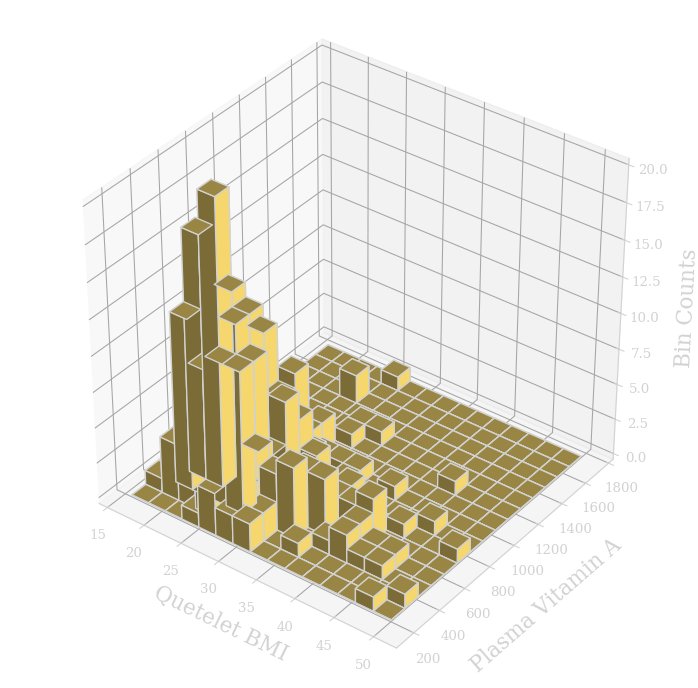

In [187]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource


hh = np.histogram2d(x,y,bins=newBinning);
xmesh,ymesh = np.meshgrid(hh[1][:-1], hh[2][:-1]);
xmesh = xmesh.flatten('F');
ymesh = ymesh.flatten('F');
zmesh = np.zeros_like(xmesh);
dx = np.mean(np.diff(hh[1]));
dy = np.mean(np.diff(hh[2]));
dz = hh[0].flatten();


fig = pyp.figure(figsize=(7.1,7), dpi=96);
ax = fig.add_subplot(111,projection='3d');

ax.bar3d(xmesh,ymesh,zmesh,dx,dy,dz, color=col['yellow'],edgecolor = col['grey']);

ax.view_init(36,-53)
ax.set_xlabel('Quetelet BMI',size=16,labelpad = 6);
ax.set_ylabel('Plasma Vitamin A',size=16,labelpad = 12);
ax.set_zlabel('Bin Counts', size=16,labelpad = 12);
fig.tight_layout(pad=0.1);

fig.savefig('../img/vitAvsBMI-jpd.svg', transparent=True);

## First scatter and ask what r is

(0.01313855303126645, 0.81632895329841393)


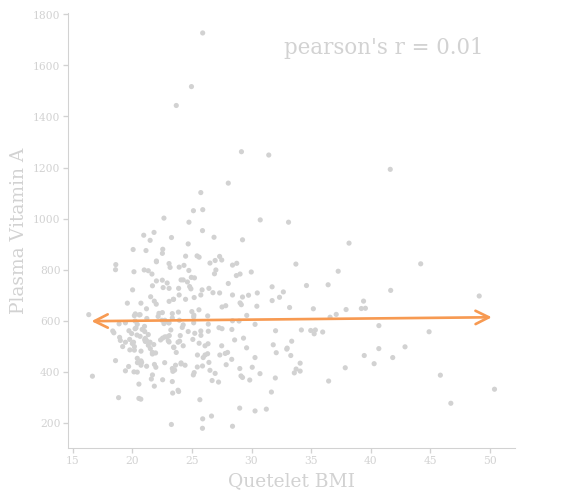

In [221]:
fig, axs = pyp.subplots(figsize=(6, 6), dpi=96)
axs = utils.multiX(axs, n=2, concatFirst=True, concatOriginal=True);

r = stats.pearsonr(x,y);
print(r)
fit=sp.polyfit(x,y,1)
xr=sp.polyval(fit,np.sort(x))

# the scatter plot:
axs[0].scatter(x, y, s=15, color=col['grey'], edgecolor='');

axs[1].annotate(
    '',
    xy = (np.sort(x)[0],xr[0]),
    xytext = (np.sort(x)[-1],xr[-1]),
    arrowprops = dict(
        arrowstyle='<->,head_length=1,head_width=0.5',
        color = col['orange'],
        linewidth=2
    )
);

axs[2].annotate(
    f"pearson's r = {r[0]:0.2f}",
    xy = (axs[0].get_xlim()[1]*0.95,axs[0].get_ylim()[1]*0.95),
    xytext = (axs[0].get_xlim()[1]*0.95,axs[0].get_ylim()[1]*0.95),
    size=16,
    ha = 'right',
    va = 'top'
);


axs[0].xaxis.set_ticks_position('bottom')
axs[0].yaxis.set_ticks_position('left')
axs[0].tick_params(axis='both', which='major', direction='out', width=1, length=4,
       labelsize=8, pad=2);
axs[0].set_xlabel('Quetelet BMI', size=14);
axs[0].set_ylabel('Plasma Vitamin A', size=14);
    
for a in axs[1:]:
    a.set_ylim(axs[0].get_ylim());
    a.axis('off');

fig.savefig('../img/vitAvsBMI-cor-simple.svg', transparent=True);